Carga remota del dataset desde la URL y descompresión del mismo.
Estoy en local de Windows, por lo tanto los comandos son la versión alternativa de cmd, salvo el wget que he decidio descargarme el exe y meterlo en system32.

In [4]:
#Descarga el dataset
!wget https://drive.upm.es/s/shvqhjNwmfdS6RS/download -O intel.zip 

#Descomprime el archivo (x) en una carpeta llamada igual que el zip (f)    
!tar -xf intel.zip 

#Borra el zip
!del intel.zip 

--2021-12-16 13:10:39--  https://drive.upm.es/s/shvqhjNwmfdS6RS/download
Resolving drive.upm.es (drive.upm.es)... 138.100.4.11
Connecting to drive.upm.es (drive.upm.es)|138.100.4.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259923470 (248M) [application/zip]
Saving to: 'intel.zip'

     0K .......... .......... .......... .......... ..........  0%  824K 5m8s
    50K .......... .......... .......... .......... ..........  0% 1,23M 4m15s
   100K .......... .......... .......... .......... ..........  0%  852K 4m29s
   150K .......... .......... .......... .......... ..........  0% 3,44M 3m40s
   200K .......... .......... .......... .......... ..........  0% 1,05M 3m43s
   250K .......... .......... .......... .......... ..........  0% 1,99M 3m26s
   300K .......... .......... .......... .......... ..........  0% 1,99M 3m15s
   350K .......... .......... .......... .......... ..........  0% 1,38M 3m13s
   400K .......... .......... .......... .......... ..

 25500K .......... .......... .......... .......... .......... 10% 4,54M 89s
 25550K .......... .......... .......... .......... .......... 10% 5,95M 89s
 25600K .......... .......... .......... .......... .......... 10% 4,74M 89s
 25650K .......... .......... .......... .......... .......... 10% 3,87M 89s
 25700K .......... .......... .......... .......... .......... 10% 6,30M 88s
 25750K .......... .......... .......... .......... .......... 10% 6,61M 88s
 25800K .......... .......... .......... .......... .......... 10% 2,96M 88s
 25850K .......... .......... .......... .......... .......... 10% 11,9M 88s
 25900K .......... .......... .......... .......... .......... 10% 2,94M 88s
 25950K .......... .......... .......... .......... .......... 10% 11,5M 88s
 26000K .......... .......... .......... .......... .......... 10% 3,32M 88s
 26050K .......... .......... .......... .......... .......... 10% 3,07M 88s
 26100K .......... .......... .......... .......... .......... 10% 11,3M 88s

199600K .......... .......... .......... .......... .......... 78% 4,05M 30s
199650K .......... .......... .......... .......... .......... 78% 4,16M 30s
199700K .......... .......... .......... .......... .......... 78% 3,99M 30s
199750K .......... .......... .......... .......... .......... 78% 4,06M 30s
199800K .......... .......... .......... .......... .......... 78% 3,92M 30s
199850K .......... .......... .......... .......... .......... 78% 4,15M 30s
199900K .......... .......... .......... .......... .......... 78% 3,99M 30s
199950K .......... .......... .......... .......... .......... 78% 4,08M 30s
200000K .......... .......... .......... .......... .......... 78% 3,76M 30s
200050K .......... .......... .......... .......... .......... 78% 12,8M 30s
200100K .......... .......... .......... .......... .......... 78% 3,51M 30s
200150K .......... .......... .......... .......... .......... 78% 9,90K 31s
200200K .......... .......... .......... .......... .......... 78%  325K 31s

Importamos todas las librerias necesarias para la realización de este ejercicio.

In [16]:
!pip3 install opencv-python
!pip install keras
!pip install tensorflow
!pip install np_utils
import cv2

  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57125 sha256=20dbdf88eb9e3bedc3eed42e49075ed82a3832253d990c6a7dde18fcbfdccf25
  Stored in directory: c:\users\amendezsa\appdata\local\pip\cache\wheels\57\18\82\402fcaf521e84dfa67b077aea34d225fc32ce6085e2cb8dda6
Successfully built np-utils


In [1]:
import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical

In [2]:
dir_base = 'intel/'
train_data_dir = 'intel/train'
validation_data_dir = 'intel/validation'

In [3]:
TRAINING_SAMPLES = 2000
TESTING_SAMPLES  = 800

#El tamaño de las imagenes
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150

#Inicializamos nuestras variables para dividir el dataset
X_train = []
X_test = []
y_train = []
y_test = []

#Establecemos los distintos tipos de labels que tenemos, así será más fácil poner el y_test
labels = ['buildings','forest','glacier','mountain','sea','street']

#Realizamos el for para obtener las imagenes

#Dividimos las imagenes para testing
for i in range(20000, 20000 + TESTING_SAMPLES // 2):
    for label in labels:        
        name = dir_base+'validation/'+label+'/'+'{}'.format(i)+'.jpg'
        try:#Creamos el try porque no todas las labels tienen todos los números
            image = cv2.imread(name,cv2.IMREAD_COLOR)
            img2 = cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X_test.append(img2)
            y_test.append(labels.index(label)) #Con respecto a la posicion en array, que es constante y nos ahorramos ifs
        except:
            continue

#Dividimos las imagenes para training       
for i in range(0,TRAINING_SAMPLES // 2):
    for label in labels:
        name = dir_base+'train/'+label+'/'+'{}'.format(i)+'.jpg'
        try:
            image = cv2.imread(name,cv2.IMREAD_COLOR)
            img2 = cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X_train.append(img2)        
            y_train.append(labels.index(label))
        except:
            continue  

Después de haber dividido el dataset para train y test, los transformamos en array de numpy y mostramos el shape para comprobar cuantos registros tenemos en cada caso.

In [4]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 150, 150, 3)
(249, 150, 150, 3)
(688,)
(249,)


In [5]:
#Normalizamos los datos para ayudar con el entrenamiento
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 6
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (688,)
Shape after one-hot encoding:  (688, 6)


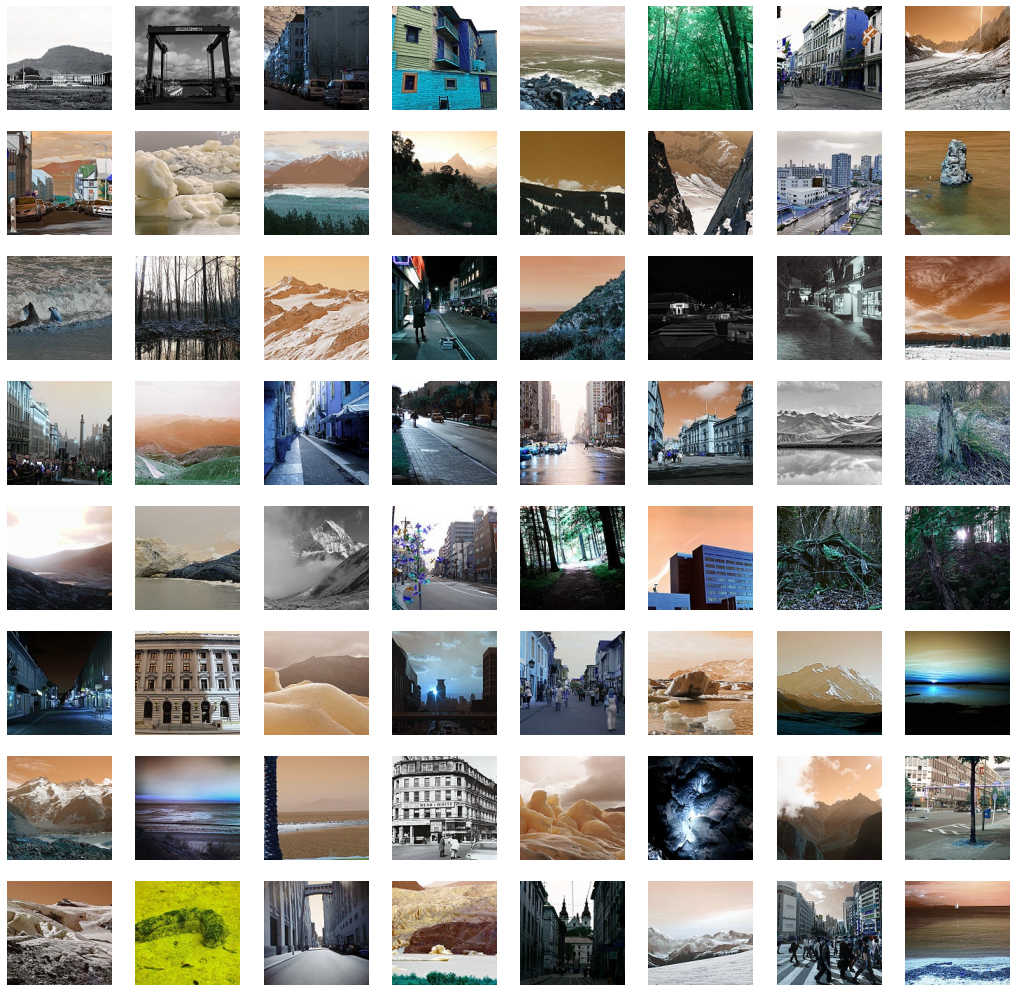

In [7]:
fig, axs = plt.subplots(8,8, figsize=(18,18))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(X_train[i*8+j])
        axs[i,j].axis('off')
plt.show()

In [11]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',
          input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    return model

In [12]:
def plot_train_val(history):
    plt.rcParams['figure.figsize'] = [15, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    
    ax1.plot(history.history['loss'], label='loss (train)')
    ax1.plot(history.history['val_loss'], label='loss (val)')
    ax1.set_title('Loss')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax2.plot(history.history['accuracy'], label='accuracy (train)')
    ax2.plot(history.history['val_accuracy'], label='accuracy (val)')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="lower right")
    ax1.grid()
    ax2.grid()
    plt.plot()

Epoch 1/40
2/2 [==============================] - 4s 1s/step - loss: 4.2883 - accuracy: 0.1439 - val_loss: 9.6080 - val_accuracy: 0.1968
Epoch 2/40
2/2 [==============================] - 19s 12s/step - loss: 9.5282 - accuracy: 0.1744 - val_loss: 5.0256 - val_accuracy: 0.2530
Epoch 3/40
2/2 [==============================] - 3s 1s/step - loss: 4.4368 - accuracy: 0.2892 - val_loss: 1.8767 - val_accuracy: 0.2490
Epoch 4/40
2/2 [==============================] - 3s 1s/step - loss: 1.8450 - accuracy: 0.2442 - val_loss: 1.6310 - val_accuracy: 0.1767
Epoch 5/40
2/2 [==============================] - 3s 1s/step - loss: 1.6521 - accuracy: 0.2064 - val_loss: 1.4171 - val_accuracy: 0.3133
Epoch 6/40
2/2 [==============================] - 3s 1s/step - loss: 1.2386 - accuracy: 0.3212 - val_loss: 0.4642 - val_accuracy: 0.4618
Epoch 7/40
2/2 [==============================] - 3s 1s/step - loss: 0.3903 - accuracy: 0.5523 - val_loss: 0.5642 - val_accuracy: 0.3574
Epoch 8/40
2/2 [=======================

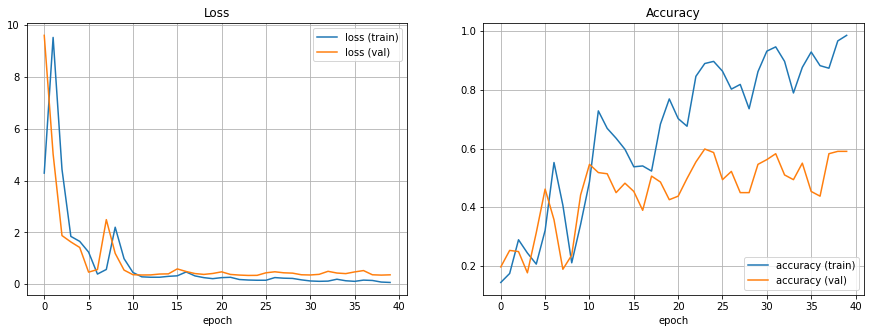

In [14]:
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    model_cnn = create_model()
    model_cnn.compile(
        loss='binary_crossentropy', 
        optimizer='rmsprop', metrics=['accuracy'])
    history = model_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                        epochs=40, batch_size=512, verbose=1)
plot_train_val(history)